In [1]:
from konlpy.tag import Hannanum
import pandas as pd

han = Hannanum()
#인코딩 문제로 불러오지 못할 경우 engine='python' 추가
df=pd.read_csv('d:/data/text/군집분석데이터.csv',engine='python')

df

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...
5,라돈,"최근 침대 매트리스에 이어 온수매트에서도 라돈이 검출됐다는 소식이 알려지면서, 가정..."
6,라돈,"침대, 생리대, 마스크 등에서 라돈이 검출되면서, 발암 물질 ‘라돈’에 대한 관심..."
7,라돈,하이젠 온수매트가 '라돈 온수매트'로 언급되고 있다.\n\n최근 한 온라인커뮤니티에...
8,라돈,겨울 난방 제품인 온수매트에서 라돈이 검출된 가운데 해당 업체가 별 문제가 되지 않...
9,라돈,"매트리스, 생리대에 이어 온수 매트에서도 라돈이 검출돼 이슈로 떠올랐다.\n\n5일..."


In [2]:
docs=[]
for i in  df['기사내용']:
    docs.append(han.nouns(i)) #명사 추출
    
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i]) #명사들 사이에 공백 추가
    
print(docs[:1])

['유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성']


In [3]:
#문서-단어 행렬 생성
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
#각 단어의 수를 세어서 인코딩한 벡터
X=vec.fit_transform(docs)
df2=pd.DataFrame(X.toarray(),columns=vec.get_feature_names())
df2

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.cluster import KMeans
#군집갯수를 3으로 설정
kmeans=KMeans(n_clusters=3, random_state=10).fit(df2)
kmeans.labels_ #모형이 분류한 라벨

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2])

In [5]:
kmeans.labels_ ==0

array([False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False])

[[-2.24540843e+00 -4.16744737e+00]
 [-3.61394020e+00 -9.89862938e+00]
 [-2.93263827e+00 -7.15934564e+00]
 [-2.14277646e+00 -3.75709735e+00]
 [-3.39788717e+00 -8.90424940e+00]
 [-3.45616194e+00  9.31168295e-01]
 [-4.17263773e+00  2.52702144e+00]
 [-6.41889065e+00  7.24085640e+00]
 [-7.92854056e+00  1.00112568e+01]
 [-7.16177452e+00  8.88184337e+00]
 [ 2.02966060e+01  4.54893915e+00]
 [ 4.18612179e+00 -5.01075363e-01]
 [ 9.93153561e+00  1.06858983e+00]
 [ 6.58016003e+00 -3.79267349e-03]
 [ 2.47623254e+00 -8.18038075e-01]]


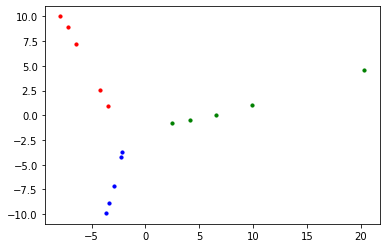

In [6]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#n_components=2 주성분을 2개로 설정
pca=PCA(n_components=2, random_state=10)
components=pca.fit_transform(df2)#주성분 분석
print(components)
df3=pd.DataFrame(data=components, columns=['component 1','component 2'])
df3.index=df['검색어'] #데이터프레임의 인덱스 지정
#모형이 분류한 라벨값이 0인 데이터의 산점도
plt.scatter(df3.iloc[kmeans.labels_==0,0],
           df3.iloc[kmeans.labels_==0,1],s=10,c='red',label='cluster1')
#모형이 분류한 라벨값이 1인 데이터의 산점도
plt.scatter(df3.iloc[kmeans.labels_==1,0],
           df3.iloc[kmeans.labels_==1,1],s=10,c='blue',label='cluster2')
#모형이 분류한 라벨값이 2인 데이터의 산점도
plt.scatter(df3.iloc[kmeans.labels_==2,0],
           df3.iloc[kmeans.labels_==2,1],s=10,c='green',label='cluster3')


In [7]:
#텍스트 군집(KMeans, 뉴스분석)

In [17]:
import pandas as pd
df=pd.read_csv('d:/data/text/news.csv')
df.head()

,category,content,date,hate,id,image,keyword,like,rate,skip,sub_category,title,update_date,url,view_count
0,1,“2028학년도에 수시·정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부...,2019-02-15 02:42:56.000000,0,4,https://pds.joins.com/news/component/htmlphoto...,"대입,교수,수능,시기,학년도",0,0,0,0,“수시·정시 통합해야” vs “수능 무력화 의도”…2028 대입 두고 논란,2019-02-16 17:50:04.872868,https://news.joins.com/article/23373597,0
1,1,최근 열린 삼보국가대표 선발전에서 1위를 한 뒤. 신재용 씨 제공\n\n고교 국가대...,2019-02-16 05:00:00.000000,1,5,http://dimg.donga.com/a/600/0/90/5/wps/NEWS/IM...,"공부,운동,유도,때,대회",0,-2,0,0,“공부하겠다는 내게 감독님이 열쇠 주셔” 서울대 가서도 유도-삼보로 꿈 키워 [양종...,2019-02-16 17:50:05.303722,http://news.donga.com/3/all/20190216/94152869/1,1
2,1,/첨부용/연세대 수험생 대나무숲\n\n우체국 전산 오류로 등록금을 못 내 연세대 합...,2019-02-13 15:00:00.000000,0,6,http://image.chosun.com/sitedata/image/201902/...,"수험,우체국,등록금,글,해당",0,0,0,0,"""등록금 전산 오류로 연대 합격 취소"" 책임 갑론을박",2019-02-16 17:50:05.412111,http://news.chosun.com/site/data/html_dir/2019...,0
3,1,"교육당국, 갑자기 통과 기준 점수 대폭 올려… 폐지 논란 재점화\n\n자사고聯, 교...",2019-02-15 15:00:00.000000,0,7,http://image.chosun.com/sitedata/image/201902/...,"자사고,평가,기준,지표,교육부",2,4,0,0,"""또 자사고 죽이기냐"" 再지정 문턱 높이자 폭발한 학교들",2019-02-16 17:50:05.495572,http://news.chosun.com/site/data/html_dir/2019...,2
4,1,[베리타스알파=권수진 기자] 14일 오후9시 마감한 상위9개대학(고려대 동국대 서강...,2019-02-15 07:37:32.000000,0,8,http://cds.veritas-a.com/news/photo/201902/144...,"충원,모집,추합,과,교육",0,0,0,0,[2019정시충원율] 상위9개대학 57.9%.. ‘상승’.. 추합 4159명,2019-02-16 17:50:06.153964,http://www.veritas-a.com/news/articleView.html...,0


In [18]:
df['category'].value_counts() #카테고리별 카운트

2    4682
1    2872
3    2121
Name: category, dtype: int64

In [14]:
df=df[df['content']==3]
df.head()

,category,content,date,hate,id,image,keyword,like,rate,skip,sub_category,title,update_date,url,view_count,content_cleaned


In [11]:
#df['content'].head()

Series([], Name: content, dtype: object)

In [19]:
import re #정규표현실 모듈
def preprocessing(sentence):
    # 한글,영문자가 아닌 경우 제거하는 정규표현식
    # [^] not
    
    sentence=re.sub('[^가-힣ㄱ-ㅎ ㅏ-ㅣ a-zA-Z]',' ',sentence)
    return sentence
#데이터프레임의 모든 라인의 content 필드에 대해 preprocessing 함수 적용
df['content_cleaned']=df['content'].apply(preprocessing)
#데이터프레임의 필드내용을 리스트로 저장
content=df['content_cleaned'].tolist()
content[:5]

['     학년도에 수시 정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부종합전형 학종      로 만들겠다는 꼼수다  학종에 대한 불신이 큰 현실을 외면한 채 혼란을 키우고 있는 김경범 서울대 교수를 국가교육회의에서 내보내야 한다  공정사회를위한국민모임 공정사회 은   일 오전   시 정부서울청사에서 기자회견 열고 국가교육회의 위원인 김경범 서울대 서어서문학과 교수의 사퇴를 촉구했다  김 교수가 학종을 옹호하고 있어 공정한 대입제도 개편에 걸림돌이 된다는 주장이다 이처럼     학년도 대입제도를 둘러싼 논란이 확산하고 있다  전날 청주 오송에서 열린 고교학점제 연구학교 교원연수 행사에서 김 교수가 미래 대입 전형을 주제로 발표한 게 불씨가 됐다  김 교수는 국가교육회의  기에서 고등교육전문위원회 위원으로 참여하고 있다 김 교수는 자료집에서  수시와 정시를   월로 통합해 수능 성적과 학생부 면접을 한꺼번에 평가하자 고 제안했다  또 수능 전 과목을 절대평가하고  EBS 연계도 폐지해야 한다고 주장했다      학년도 고교학점제에 따라     학년도 대입을 개편해야 한다면서 이같이 밝힌 것이다 현행 대입은 수시와 정시로 시기가 구분돼 있어 수시는  월  정시는   월 말에 원서를 접수한다  수시 준비하느라 고   학기 때 학교 수업이 제대로 이뤄지지 않는다는 비판은 꾸준히 제기돼 왔다  김 교수의 주장에 따르면 선발 시기를 통합하면 고  교실도 정상화하고 학생 학부모 교사의 부담도 줄일 수 있다는 것이다 이에 대해 대학 관계자와 교사 학부모는 엇갈린 의견을 내놨다  고교 교사는 환영했지만  대학 입학관계자와 학부모는 부정적이었다  서울 일반고의 한 교사는  대입 전형 시기가 나뉘어 있어 교사와 학생 학부모의 부담이 크고  고   학기 수업이 파행된 것은 맞다 며  이번에 나온 방안은 아니더라도 어떤 식으로든 변화가 필요하다 고 말했다 반면 서울 사립대의 한 입학처장은  고교별 수준이 제각각인 상황에서 수능까지 절대평가로 바뀌면 변별력이 크게 약화할

In [20]:
#벡터 생성
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
X=vectorizer.fit_transform(content)
df2=pd.DataFrame(X.toarray(),
               columns=vectorizer.get_feature_names())
df2.head()

,aa,aaas,aaa등급,aaa이었던,aaos,aaou,aaron,aatip,aav,aa다,...,힙합신,힙합신의,힙합에,힙합에서,힙합으로는,힙합을,힙합음악,힙합의,힙합이,힙합이라는
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df2.shape

(9675, 291208)

In [22]:
#정규화
from sklearn.preprocessing import normalize
X=normalize(X)

In [23]:
#군집분석
from sklearn.cluster import KMeans
#군집갯수 3개로 설정
kmeans=KMeans(n_clusters=3, random_state=10).fit(X)

In [24]:
pd.Series(kmeans.labels_).value_counts()

0    7982
1    1084
2     609
dtype: int64

In [25]:
#모형이 예측한 값을 데이터프레임에 추가
df['labels']=kmeans.labels_
df

,category,content,date,hate,id,image,keyword,like,rate,skip,sub_category,title,update_date,url,view_count,content_cleaned,labels
0,1,“2028학년도에 수시·정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부...,2019-02-15 02:42:56.000000,0,4,https://pds.joins.com/news/component/htmlphoto...,"대입,교수,수능,시기,학년도",0,0,0,0,“수시·정시 통합해야” vs “수능 무력화 의도”…2028 대입 두고 논란,2019-02-16 17:50:04.872868,https://news.joins.com/article/23373597,0,학년도에 수시 정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부...,0
1,1,최근 열린 삼보국가대표 선발전에서 1위를 한 뒤. 신재용 씨 제공\n\n고교 국가대...,2019-02-16 05:00:00.000000,1,5,http://dimg.donga.com/a/600/0/90/5/wps/NEWS/IM...,"공부,운동,유도,때,대회",0,-2,0,0,“공부하겠다는 내게 감독님이 열쇠 주셔” 서울대 가서도 유도-삼보로 꿈 키워 [양종...,2019-02-16 17:50:05.303722,http://news.donga.com/3/all/20190216/94152869/1,1,최근 열린 삼보국가대표 선발전에서 위를 한 뒤 신재용 씨 제공 고교 국가대표 ...,0
2,1,/첨부용/연세대 수험생 대나무숲\n\n우체국 전산 오류로 등록금을 못 내 연세대 합...,2019-02-13 15:00:00.000000,0,6,http://image.chosun.com/sitedata/image/201902/...,"수험,우체국,등록금,글,해당",0,0,0,0,"""등록금 전산 오류로 연대 합격 취소"" 책임 갑론을박",2019-02-16 17:50:05.412111,http://news.chosun.com/site/data/html_dir/2019...,0,첨부용 연세대 수험생 대나무숲 우체국 전산 오류로 등록금을 못 내 연세대 합격이...,0
3,1,"교육당국, 갑자기 통과 기준 점수 대폭 올려… 폐지 논란 재점화\n\n자사고聯, 교...",2019-02-15 15:00:00.000000,0,7,http://image.chosun.com/sitedata/image/201902/...,"자사고,평가,기준,지표,교육부",2,4,0,0,"""또 자사고 죽이기냐"" 再지정 문턱 높이자 폭발한 학교들",2019-02-16 17:50:05.495572,http://news.chosun.com/site/data/html_dir/2019...,2,교육당국 갑자기 통과 기준 점수 대폭 올려 폐지 논란 재점화 자사고 교육부...,0
4,1,[베리타스알파=권수진 기자] 14일 오후9시 마감한 상위9개대학(고려대 동국대 서강...,2019-02-15 07:37:32.000000,0,8,http://cds.veritas-a.com/news/photo/201902/144...,"충원,모집,추합,과,교육",0,0,0,0,[2019정시충원율] 상위9개대학 57.9%.. ‘상승’.. 추합 4159명,2019-02-16 17:50:06.153964,http://www.veritas-a.com/news/articleView.html...,0,베리타스알파 권수진 기자 일 오후 시 마감한 상위 개대학 고려대 동국대 서강...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9670,2,"[美北 하노이 회담 결렬 후 뉴스 보도]\n\n""김정은, 능수능란한 외교적 언사… ...",2019-03-04 15:00:00.000000,0,9674,http://image.chosun.com/sitedata/image/201903/...,"회담,트럼프,결렬,보도,협상",0,0,0,0,"'트럼프는 오만, 김정은은 노련'하다는 지상파",2019-03-05 00:50:48.177623,http://news.chosun.com/site/data/html_dir/2019...,0,하노이 회담 결렬 후 뉴스 보도 김정은 능수능란한 외교적 언사 정상...,1
9671,2,북한이 하노이 2차 북미정상회담이 진행되고 있는 중에도 우라늄농축시설을 가동하고 있...,2019-03-04 15:00:00.000000,0,9675,http://image.chosun.com/facebook/newson.png,"농축,시설,생산,우라늄,가동",0,0,0,0,"""北, 하노이 회담 중에도 영변 우라늄 고농축 시설 가동"" IAEA",2019-03-05 00:50:49.001492,http://news.chosun.com/site/data/html_dir/2019...,0,북한이 하노이 차 북미정상회담이 진행되고 있는 중에도 우라늄농축시설을 가동하고 있...,1
9672,3,그룹 빅뱅 멤버 승리가 경찰 출신 변호사를 선임한 것으로 전해졌다.\n\n법조계에 ...,2019-03-05 08:55:35.000000,0,9676,http://newsimg.hankookilbo.com/2019/03/05/2019...,"승리,경찰,의혹,지난달,성접대",0,0,0,0,"승리, 경찰 출신 변호사 선임…권익위, 성접대 의혹 카톡 확보",2019-03-05 00:50:49.977485,http://www.hankookilbo.com/News/Read/201903050...,0,그룹 빅뱅 멤버 승리가 경찰 출신 변호사를 선임한 것으로 전해졌다 법조계에 따르...,0
9673,3,그룹 인피니트 장동우가 데뷔 때 소속사에서 정한 목표가 동방신기였다고 밝혔다.장동우...,2019-03-05 00:50:50.000000,0,9677,http://pds.joins.com/news/component/htmlphoto_...,"앨범,보컬,인피니트,데뷔,동방",0,0,0,0,"인피니트 장동우, ”인피니트 데뷔 때 목표, 동방신기”",2019-03-05 00:50:50.437183,http://isplus.joins.com/article/160/23401160.h...,0,그룹 인피니트 장동우가 데뷔 때 소속사에서 정한 목표가 동방신기였다고 밝혔다 장동우...,0


In [ ]:
#구조적 군집분석

In [26]:
import pandas as pd
df=pd.read_csv('d:/data/text/군집분석데이터.csv',encoding='ms949')
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [27]:
df['기사내용']

0     유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1     유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2     유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3     유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상...
4     유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...
5     최근 침대 매트리스에 이어 온수매트에서도 라돈이 검출됐다는 소식이 알려지면서, 가정...
6      침대, 생리대, 마스크 등에서 라돈이 검출되면서, 발암 물질 ‘라돈’에 대한 관심...
7     하이젠 온수매트가 '라돈 온수매트'로 언급되고 있다.\n\n최근 한 온라인커뮤니티에...
8     겨울 난방 제품인 온수매트에서 라돈이 검출된 가운데 해당 업체가 별 문제가 되지 않...
9     매트리스, 생리대에 이어 온수 매트에서도 라돈이 검출돼 이슈로 떠올랐다.\n\n5일...
10    복면가왕’ 88대 가왕 자리는 2연승의 왕밤빵이 차지했다.\n\n4일 오후 방송된 ...
11    복면가왕'에 출연해 왕밤빵에 패하면서 얼굴을 공개한 '축음기' 천단비에 관심이 쏠리...
12    지난 4일 방송된 MBC ‘복면가왕’에서는 왕밤빵에 맞서 축음기, 조커, 북극곰 버...
13    복면가왕' 왕밤빵의 정체가 더욱더 오리무중에 빠졌다. \n\n4일 방송된 MBC 예...
14    복면가왕' 왕밤빵이 첫 방어전에 성공하며 2연승을 차지했다.\n지난 4일 방송된 M...
Name: 기사내용, dtype: object

In [28]:
from konlpy.tag import Hannanum
hannanum=Hannanum()
docs=[]
for i in df['기사내용']:
    docs.append(hannanum.nouns(i)) #명사만 추출
    
for i in range(len(docs)):
    docs[i]=' '.join(docs[i]) #명사와 명사 사이에 공백 추가
    
docs

['유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성',
 '유한양행 1조4000억원 규모 기술이전 계약 체결 소식 가격제한폭 5일 오전 9시 3분 유한양행 전날 5만3000원(29. 78 23만1000원 거래 사흘 연속 강세 유한양행 글로벌 제약사 존슨앤존슨(J&J) 자회사 얀센 바이오테크(Janssen 저해제 ‘레이저티닙’(프로젝트명 YH25448) 기술수출 계약 체결 이날 계약규모 약 1조4000억원(12억5500만달러) 반환 의무 계약금 560억원(5000 이번 계약 얀센 전세계 레이저티닙 개발 제조 상업화 독점적 권리 국내 개발 상업화 권리 유한양행 유 유한양행 얀센 바이오텍 내년 레이저티닙 단일요법 병용요법 글로벌 임상시험 공동 진행 예정 유한양행 개발 허가 상업화 성공 단계별 마일스톤 기술료 12억500 달러(약 1조3500억원 수 임상시험 허가 상업화 실패 경우 기술이전 계약 종료 경우 유한양행 얀센 측 지급 위약금',
 '유한양행 다국적 제약사 얀센 기술수출 소식 주가 5일 장 초반 상한가 유한양행 이날 오전 9시 5분 현재 유가증권시장 전 거래일 5만3000원(29. 78 23만1000원 거래 유한양행 얀센 바이오테크 상피세포 성장 자 수용체 표적 항암 치료제 기술 이전 계약 체결 이날 장 개장 전 공시 이번 계약금 5000 개발 상업화 단계별 기술료(마일스톤) 12억500 달러 기술수출 규모 12억5500 달러(약 1조4000억원 서근희 삼성증권 연구원 유한양행 이번 기술수출 계약 소식 한미약품 이후 기술 이전 계약 투자자들 갈증 해소 전망 "한미약품 사노피 기술 이전 계약 체결 이후 2번 계약 규모 말',
 '유한양행 얀센 바이오테크((Janssen 상피세포

In [29]:
vec.get_feature_names()

['10대',
 '10배',
 '10분',
 '12억500',
 '12억500만달러',
 '12억5500',
 '12억5500만달러',
 '12억5천500',
 '15명',
 '16',
 '1군',
 '1급',
 '1라운드',
 '1박2일간',
 '1시간',
 '1조3416억원',
 '1조3500억원',
 '1조4000억원',
 '1천원',
 '2005년',
 '2007년',
 '2015년',
 '20대',
 '218bq',
 '218베크렐',
 '22만8000원',
 '23만1000원',
 '29',
 '2라운드',
 '2라운드에서',
 '2번',
 '2연승',
 '2일',
 '2주',
 '3개',
 '3년',
 '3라운드에서',
 '3분',
 '3세대',
 '47명',
 '4시',
 '4인',
 '4일',
 '50',
 '5000',
 '5000만',
 '5000만달러',
 '50대',
 '50분',
 '520',
 '520베크렐',
 '560억원',
 '5만2500원',
 '5만3000원',
 '5분',
 '5일',
 '5천',
 '60표',
 '69표',
 '78',
 '88대',
 '8개',
 '8배',
 '8월',
 '91',
 '9시',
 '9시9분',
 'away',
 'beautiful',
 'bq',
 'break',
 'egfr',
 'iarc',
 'janssen',
 'rain',
 'us',
 'yh25448',
 '가격제한폭',
 '가능성',
 '가동',
 '가면',
 '가수',
 '가수들',
 '가스',
 '가왕',
 '가왕답게',
 '가왕방어전',
 '가왕전',
 '가요계',
 '가운데',
 '가정',
 '가정용',
 '가창력',
 '각각',
 '각시탈',
 '각자',
 '각종',
 '갈증',
 '감미',
 '감미로운',
 '감사하다',
 '감성',
 '감회',
 '강세',
 '강조',
 '개발',
 '개장',
 '거래',
 '거래일',
 '거론',
 '거짓말',
 '건빵선생',
 '검사',
 '검사결과',
 '검출',
 '게시물

In [30]:
#카운트벡터
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
#x축 단어, y축 출현횟수
X=vec.fit_transform(docs)
df2=pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df2

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [32]:
#계층적 군집모형
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(df2)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

[[ 0.          3.          6.          2.        ]
 [ 1.          4.         10.34408043  2.        ]
 [13.         14.         10.48808848  2.        ]
 [ 2.         15.         11.13552873  3.        ]
 [11.         17.         11.22497216  3.        ]
 [ 5.         18.         11.83215957  4.        ]
 [19.         20.         12.          7.        ]
 [16.         21.         12.32882801  9.        ]
 [ 6.         22.         13.49073756 10.        ]
 [ 7.          8.         14.4222051   2.        ]
 [ 9.         24.         14.73091986  3.        ]
 [12.         23.         15.13274595 11.        ]
 [25.         26.         15.96871942 14.        ]
 [10.         27.         18.60107524 15.        ]]


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [92.5, 92.5, 123.75, 123.75],
  [70.0, 70.0, 108.125, 108.125],
  [55.0, 55.0, 89.0625, 89.0625],
  [45.0, 45.0, 72.03125, 72.03125],
  [22.5, 22.5, 58.515625, 58.515625],
  [5.0, 5.0, 40.5078125, 40.5078125]],
 'dcoord': [[0.0, 14.422205101855956, 14.422205101855956, 0.0],
  [0.0, 14.730919862656235, 14.730919862656235, 14.422205101855956],
  [0.0, 10.344080432788601, 10.344080432788601, 0.0],
  [0.0, 10.488088481701515, 10.488088481701515, 0.0],
  [0.0, 11.224972160321824, 11.224972160321824, 10.488088481701515],
  [0.0, 6.0, 6.0, 0.0],
  [0.0, 11.135528725660043, 11.135528725660043, 6.0],
  [0.0, 11.832159566199232, 11.832159566199232, 11.135528725660043],
  [11.224972160321824, 12.0, 12.0, 11.832159566199232],
  [10.344080432788601, 1

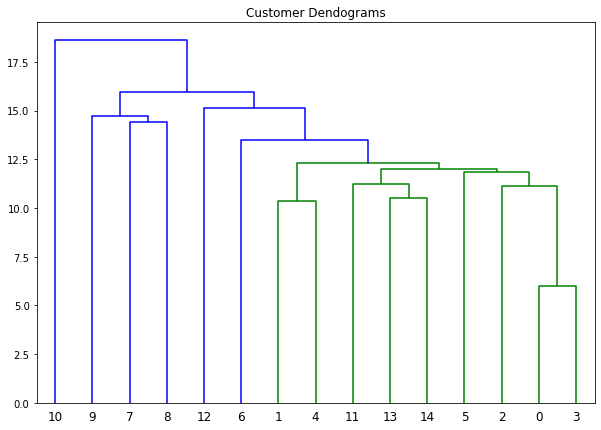

In [34]:
#플로팅
%matplotlib inline
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
result=shc.linkage(df2)
print(result)
shc.dendrogram(result) #덴드로그램 그래프 (트리구조를 표현하는 프로그램)